In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import contourpy
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as colors
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from _FigureJiazeHelper import *
from _DetectabilityWithMeta import *
from _CommunityDetect import *
from EXPERIMENT_MINORITY import *
from scipy.optimize import linear_sum_assignment

%load_ext autoreload
%autoreload 2

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


In [2]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=10)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 10  # 'large'
plt.rcParams['lines.markersize'] = 12
plt.rcParams['axes.linewidth'] = 0.5

# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

In [3]:
# For big n
n = 6000
d = 50
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = True
fileID = 'amiExp24.1.27' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_fixsubparameter'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

8.0


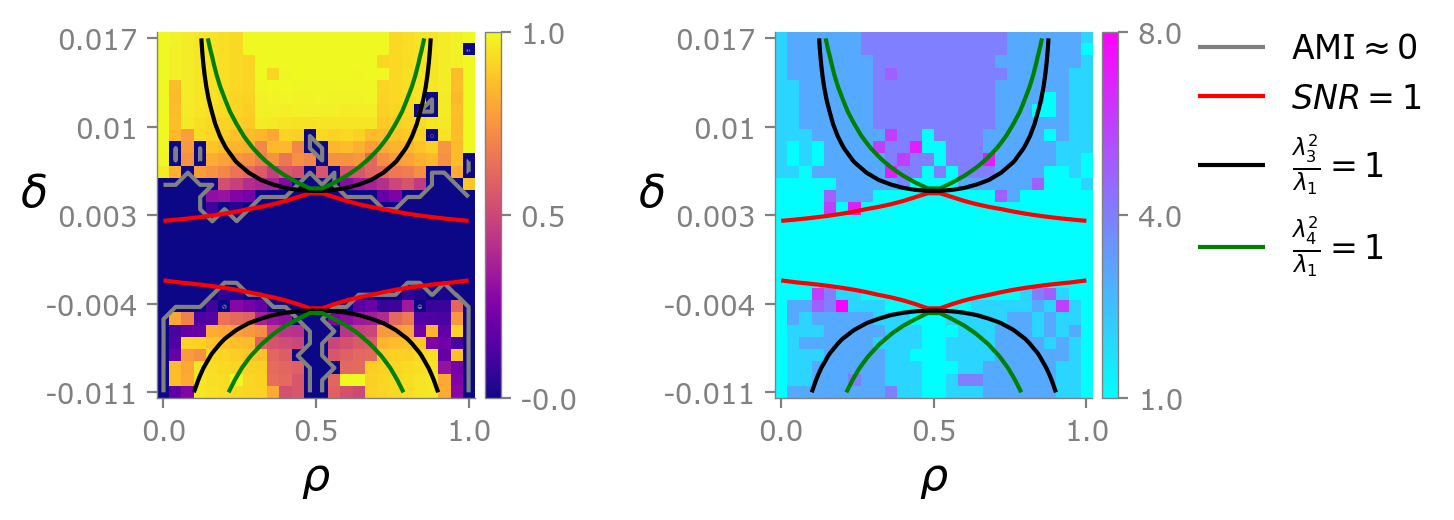

In [6]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)

handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=4, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, vmax=np.max(sub_num_group), ytickprecision=3)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
lgd = fig.legend(handels, [r'AMI$\approx$0', r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)
plt.subplots_adjust(wspace=0.8)
save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_" + f'Z_s{Z_s}Z_b{Z_b}' + ".pdf"
# # plt.tight_layout()
plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [7]:
np.unique(sub_num_group, return_counts=True)

(array([1., 2., 3., 4., 5., 6., 7., 8.]),
 array([291, 124, 233, 115,   6,   6,   4,   1], dtype=int64))

# reduce time consume & big epsilon for disassortative case
initial_epsilon = 10 for disassortative
initial_epsilon = 0.1 for assortative

In [5]:
# For big n
n = 6000
d = 50
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = True
fileID = 'amiExp24.1.31' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_fixsubparameter_reducetimecost'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

6.2


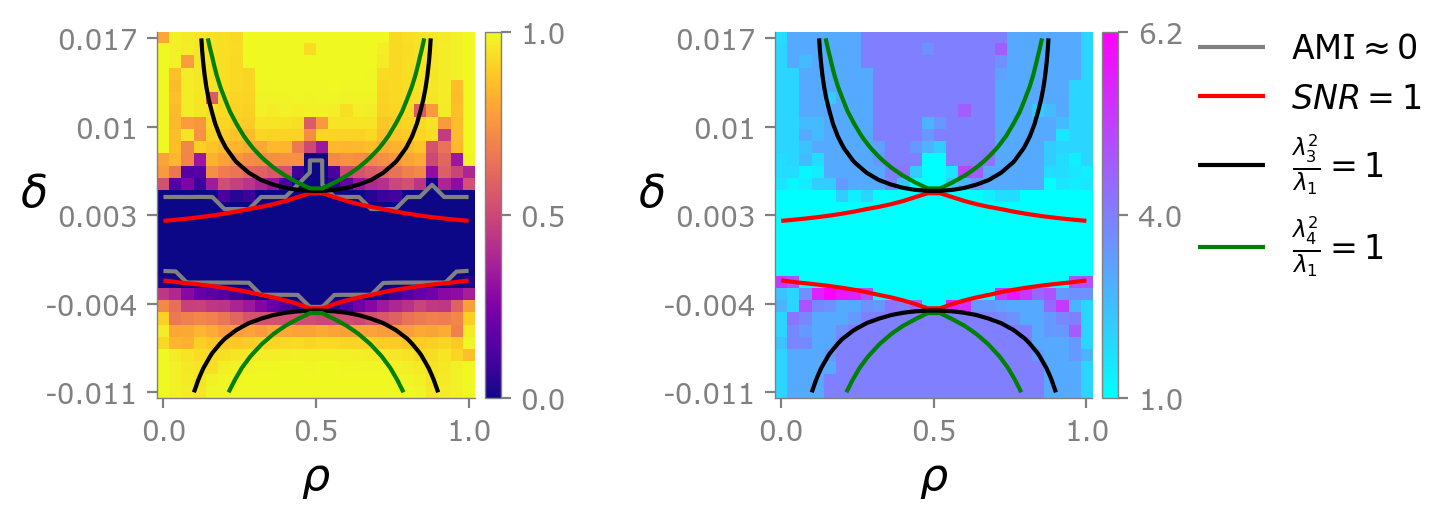

In [6]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)

handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=4, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, vmax=np.max(sub_num_group), ytickprecision=3)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
lgd = fig.legend(handels, [r'AMI$\approx$0', r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)
plt.subplots_adjust(wspace=0.8)
save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_" + f'Z_s{Z_s}Z_b{Z_b}' + ".pdf"
# # plt.tight_layout()
plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [7]:
np.unique(sub_num_group, return_counts=True)

(array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6, 5.8, 6.2]),
 array([218,   2,   7,   6,  10,  51,  10,   4,   7,   6, 176,   3,  19,
          9,   8, 215,   4,   3,   4,   6,   1,   4,   1,   3,   2,   1],
       dtype=int64))

# bigger eosilon for disassortative and smaller epsilon for assortative
0.01 and 20

In [4]:
# For big n
n = 6000
d = 50
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = True
fileID = 'amiExp24.2.4' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_fixsubparameter_reducetimecost_farinitialepsilon'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

D:\BackProgram\Anaconda\envs\network\Lib\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


7.0


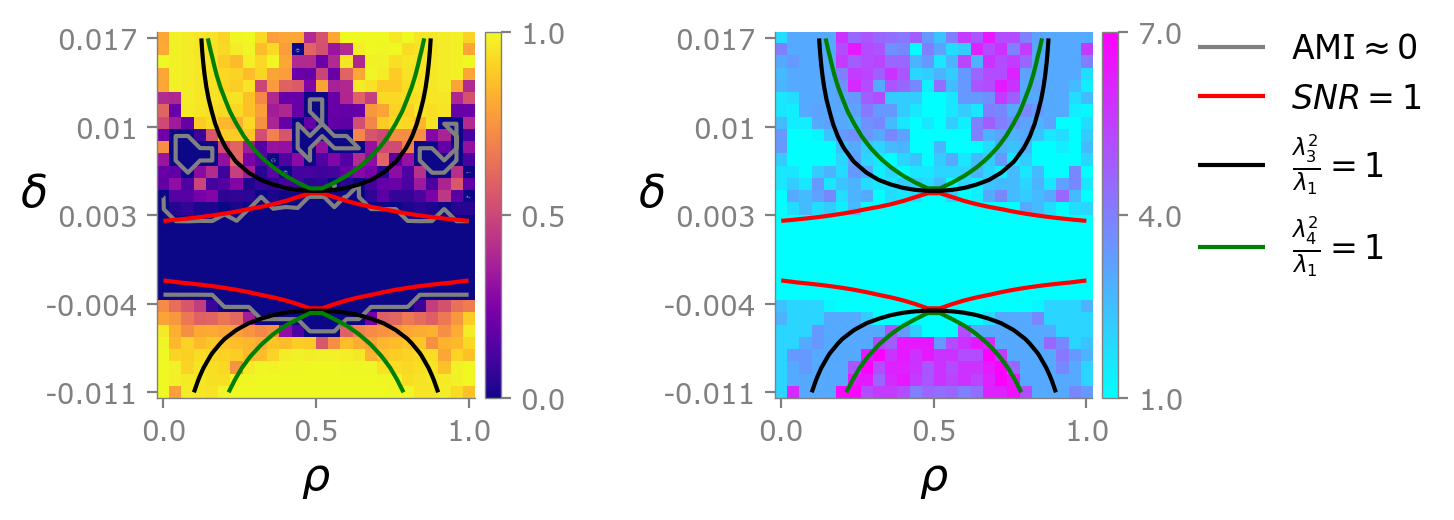

In [5]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)

handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=4, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, vmax=np.max(sub_num_group), ytickprecision=3)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
lgd = fig.legend(handels, [r'AMI$\approx$0', r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)
plt.subplots_adjust(wspace=0.8)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_" + f'Z_s{Z_s}Z_b{Z_b}' + ".pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

0.2 and 10
when r=s e_rs no half

In [3]:
# For big n
n = 6000
d = 50
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = True
fileID = 'amiExp24.2.7' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_fixsubparameter_reducetimecost_farinitialepsilon'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

3.0


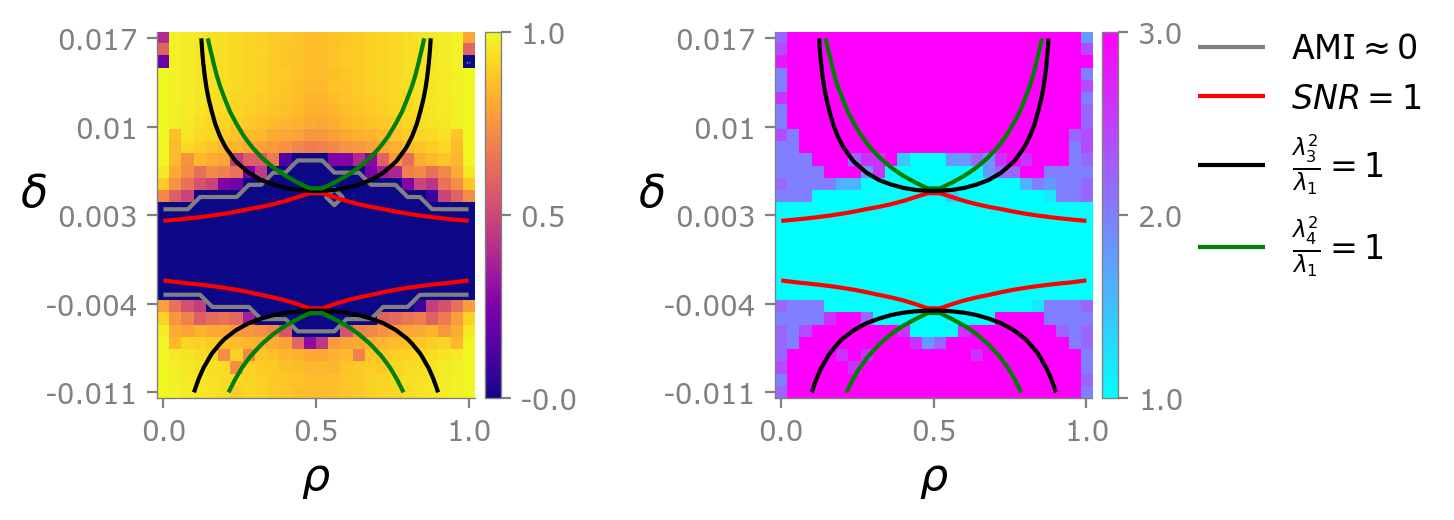

In [5]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)

handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=2, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, vmax=np.max(sub_num_group), ytickprecision=3)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
lgd = fig.legend(handels, [r'AMI$\approx$0', r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)
plt.subplots_adjust(wspace=0.8)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_" + f'Z_s{Z_s}Z_b{Z_b}' + ".pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

0.2 and 5

when r=s e_rs half

In [3]:
# For big n
n = 6000
d = 50
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = True
fileID = 'amiExp24.2.10' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_fixsubparameter_reducetimecost_farinitialepsilon'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

D:\BackProgram\Anaconda\envs\network\Lib\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


3.8


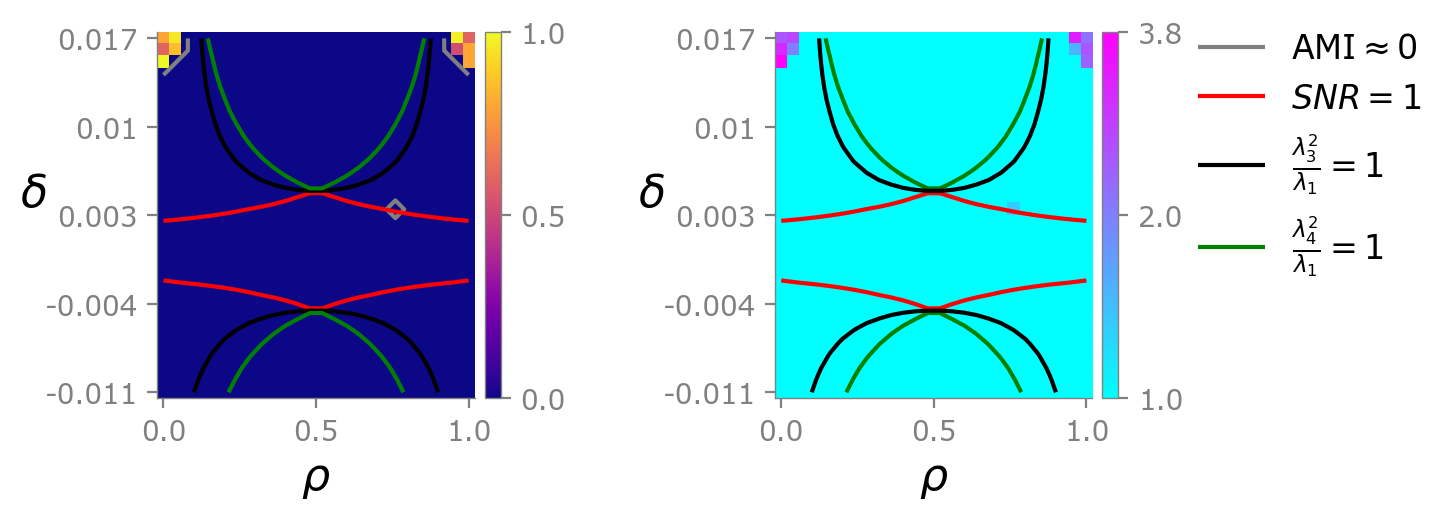

In [4]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)

handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=2, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, vmax=np.max(sub_num_group), ytickprecision=3)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
lgd = fig.legend(handels, [r'AMI$\approx$0', r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)
plt.subplots_adjust(wspace=0.8)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_" + f'Z_s{Z_s}Z_b{Z_b}' + ".pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

0.2 and 5

when r=s e_rs no half, with Sigma_b

In [6]:
# For big n
n = 6000
d = 50
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = True
fileID = 'amiExp24.2.11' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_fixsubparameter_reducetimecost_farinitialepsilon'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
addFileID = 'amiExp24.2.12' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_fixsubparameter_reducetimecost_0.2_5_Sigmab_more'
add_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda, add_path=add_path)

Additional result adding...


4.0


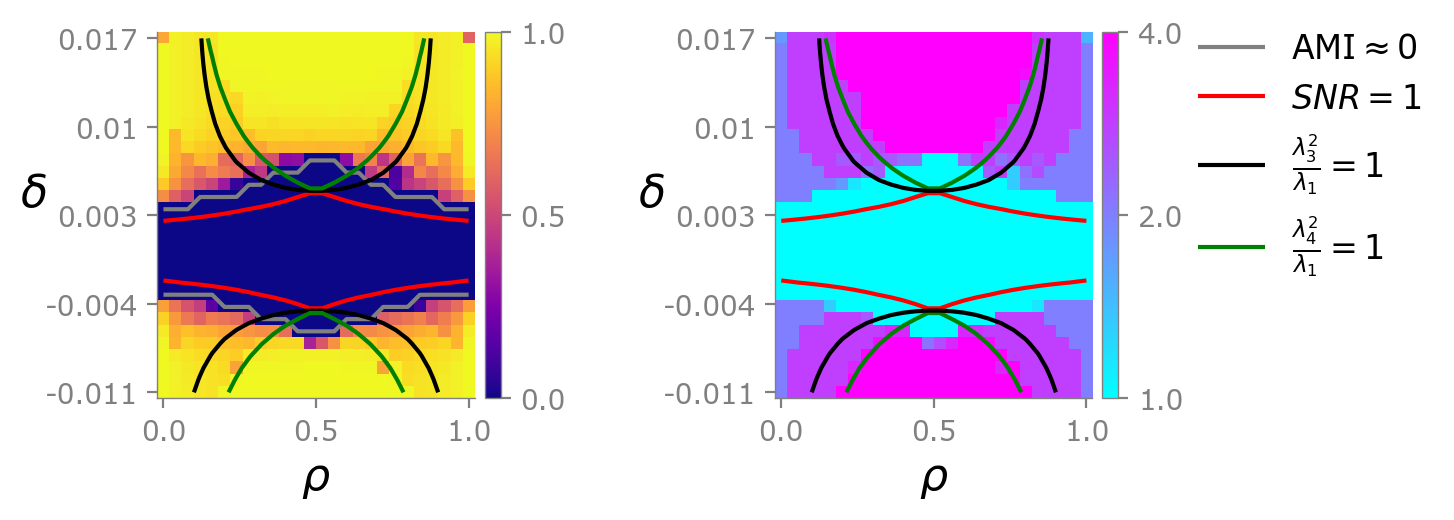

In [7]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)

handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=2, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, vmax=np.max(sub_num_group), ytickprecision=3)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
lgd = fig.legend(handels, [r'AMI$\approx$0', r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)
plt.subplots_adjust(wspace=0.8)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_" + f'Z_s{Z_s}Z_b{Z_b}' + ".pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

# BP given true q and na cab

In [4]:
# For big n
n = 6000
d = 50
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = True
DC = False
BP = True
fileID = 'amiExp24.2.15' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_fixsubparameter'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
# addFileID = 'amiExp24.2.12' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
#                               f'{"givenNumGroup" if givenNumGroup else ""}_' \
#                               f'{"DC" if DC else ""}_{"BP" if BP else ""}_fixsubparameter_reducetimecost_0.2_5_Sigmab_more'
# add_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

4.0


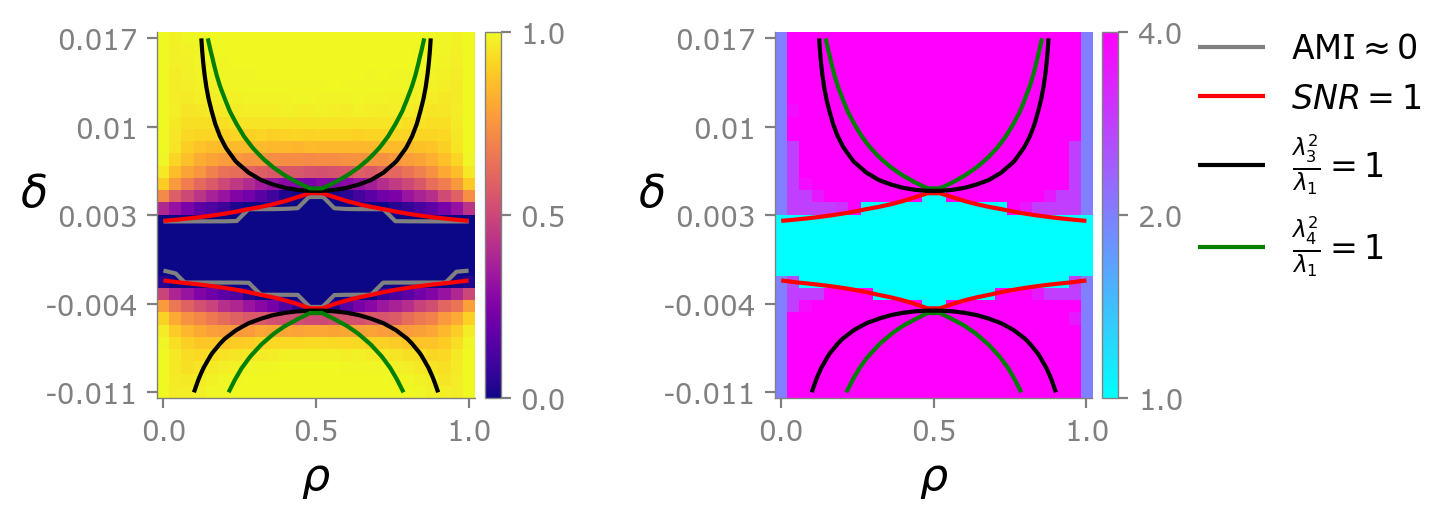

In [5]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)

handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=2, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, vmax=np.max(sub_num_group), ytickprecision=3)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
lgd = fig.legend(handels, [r'AMI$\approx$0', r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)
plt.subplots_adjust(wspace=0.8)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_" + f'Z_s{Z_s}Z_b{Z_b}' + ".pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

# BP learnq by FreeEnergy
also change number of group to unique(partion), not the minimum q(with given q to BP, the result partition can have another q)

In [5]:
# For big n
n = 6000
d = 50
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = True
learnqby = 'FE'
fileID = 'amiExp24.2.15' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_learnqby{"MDL" if learnqby == "MDL" else "FE"}'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
# addFileID = 'amiExp24.2.12' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
#                               f'{"givenNumGroup" if givenNumGroup else ""}_' \
#                               f'{"DC" if DC else ""}_{"BP" if BP else ""}_fixsubparameter_reducetimecost_0.2_5_Sigmab_more'
# add_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

5.0


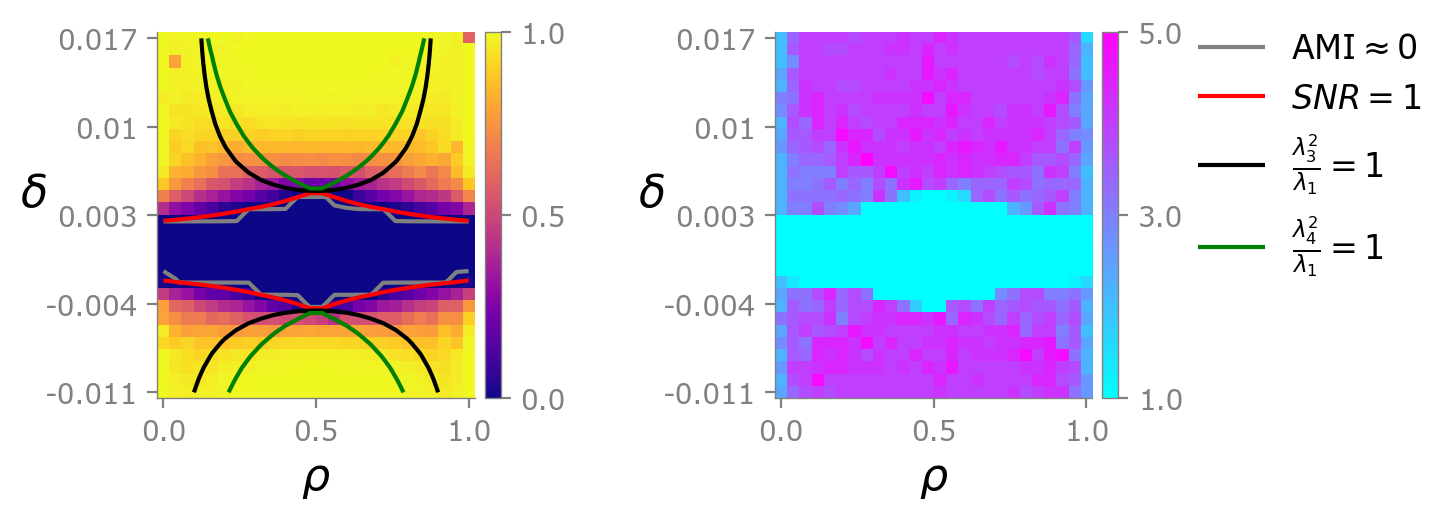

In [6]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)

handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=3, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, vmax=np.max(sub_num_group), ytickprecision=3)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
# contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
# contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
# contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
lgd = fig.legend(handels, [r'AMI$\approx$0', r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)
plt.subplots_adjust(wspace=0.8)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_" + f'Z_s{Z_s}Z_b{Z_b}' + ".pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

# BH learnq by MDL

In [4]:
# For big n
n = 6000
d = 50
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = False
learnqby = 'MDL'
fileID = 'amiExp24.2.19' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_learnqby{"MDL" if learnqby == "MDL" else "FE"}'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
# addFileID = 'amiExp24.2.12' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
#                               f'{"givenNumGroup" if givenNumGroup else ""}_' \
#                               f'{"DC" if DC else ""}_{"BP" if BP else ""}_fixsubparameter_reducetimecost_0.2_5_Sigmab_more'
# add_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

4.0


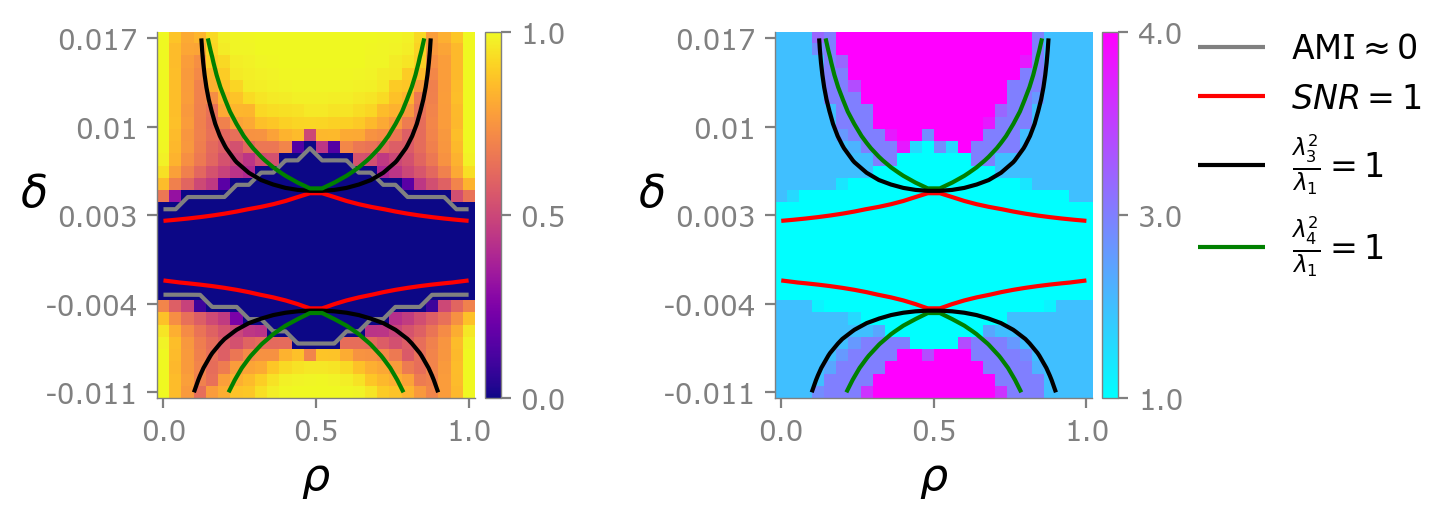

In [5]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)

handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=3, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, vmax=np.max(sub_num_group), ytickprecision=3)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
lgd = fig.legend(handels, [r'AMI$\approx$0', r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)
plt.subplots_adjust(wspace=0.8)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_" + f'Z_s{Z_s}Z_b{Z_b}' + ".pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

# BP given true q and learned na cab

In [3]:
# For big n
n = 6000
d = 50
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = True
DC = False
BP = True
learnqby = 'MDL'
givenNacab = False
fileID = 'amiExp24.2.20' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_{"givenNacab" if givenNacab else "learnNacab"}'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
# addFileID = 'amiExp24.2.12' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
#                               f'{"givenNumGroup" if givenNumGroup else ""}_' \
#                               f'{"DC" if DC else ""}_{"BP" if BP else ""}_fixsubparameter_reducetimecost_0.2_5_Sigmab_more'
# add_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

4.0


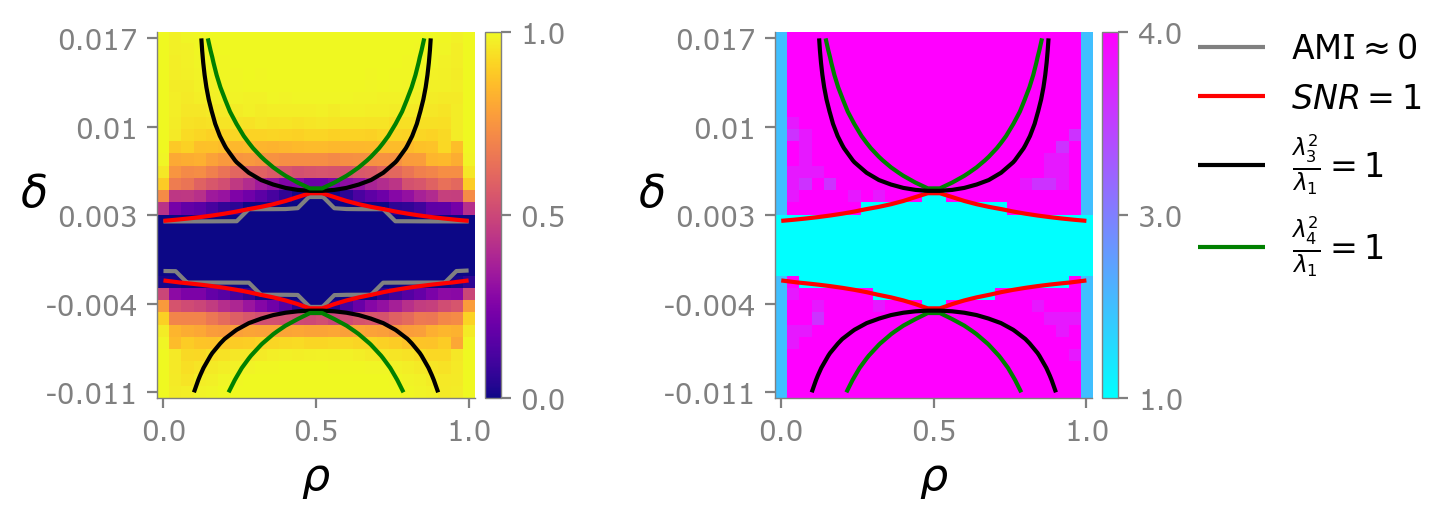

In [4]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)

handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=3, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, vmax=np.max(sub_num_group), ytickprecision=3)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
lgd = fig.legend(handels, [r'AMI$\approx$0', r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)
plt.subplots_adjust(wspace=0.8)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_" + f'Z_s{Z_s}Z_b{Z_b}' + ".pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

# BP 50 degree 10learn5exp

In [5]:
# For big n
n = 6000
d = 50
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = True
learnqby = 'FE'
givenNacab = False
fileID = 'amiExp24.2.21' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_learnqby{"MDL" if learnqby == "MDL" else "FE"}'
    
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
# addFileID = 'amiExp24.2.12' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
#                               f'{"givenNumGroup" if givenNumGroup else ""}_' \
#                               f'{"DC" if DC else ""}_{"BP" if BP else ""}_fixsubparameter_reducetimecost_0.2_5_Sigmab_more'
# add_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

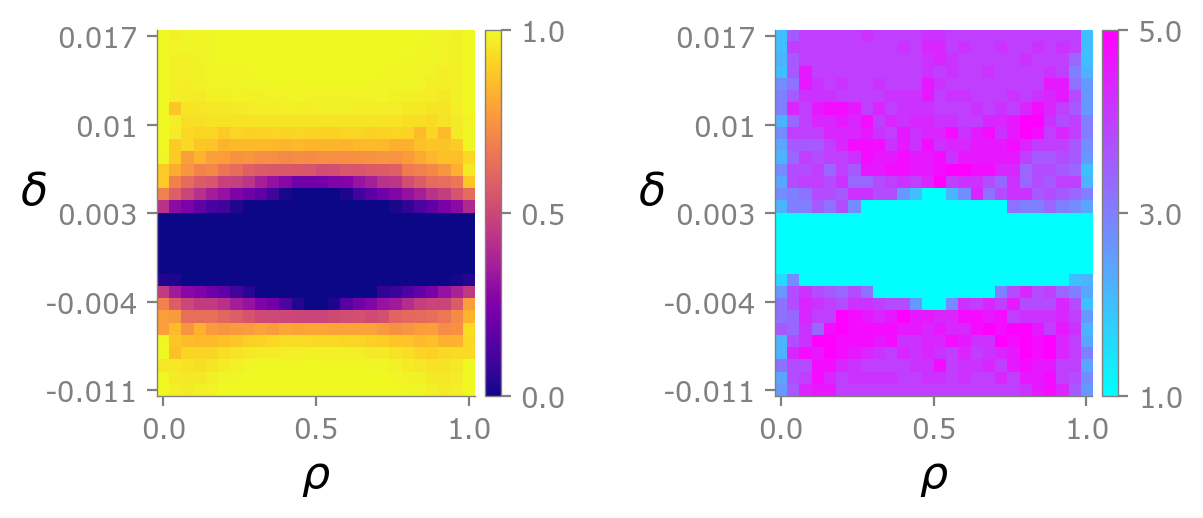

In [8]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
# handels = []
# handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
# plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
# plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
# plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
# handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)

# handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
# handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=3, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, vmax=np.max(sub_num_group), ytickprecision=3)
# plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
# plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
# plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
# contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
# contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
# contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
# lgd = fig.legend(handels, [r'AMI$\approx$0', r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
#            loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)
plt.subplots_adjust(wspace=0.8)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_" + f'Z_s{Z_s}Z_b{Z_b}' + ".pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')